In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importa dati divisi per fasce d'età
Report dell'8 Settembre, https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_8-settembre-2021.pdf
I dati si riferiscono ai 30 giorni precedenti

In [29]:
df_età = pd.read_csv('dati/dati_ISS_età_8settembre21.csv', sep=';')

df_età

,età,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
0,12-39,7378291,6927425,64612,11719,1711,105,63,3,7,0
1,40-59,4990358,12034678,29879,15993,2459,258,275,17,85,10
2,60-79,1847629,11172162,8631,11201,1771,736,331,91,257,62
3,80+,291252,4157813,1768,4862,638,1019,43,46,222,208


## Elaborazione dati

In [30]:
# ricava i tassi, divivendo per la popolazione vaccinati e non vaccinata
tassi = (7/30)*10**5*np.transpose([df_età['casi non vaccinati']/df_età['non vaccinati'],
         df_età['casi vaccinati']/df_età['vaccinati completo'],                  
         df_età['ospedalizzati non vaccinati']/df_età['non vaccinati'],
         df_età['ospedalizzati vaccinati']/df_età['vaccinati completo'],
         df_età['terapia intensiva non vaccinati']/df_età['non vaccinati'],
         df_età['terapia intensiva vaccinati']/df_età['vaccinati completo'],
         df_età['decessi non vaccinati']/df_età['non vaccinati'],
         df_età['decessi vaccinati']/df_età['vaccinati completo']])


df_tassi = pd.DataFrame(tassi)
df_tassi.columns = ['Casi, non vaccinati',
                    'Casi, vaccinati',
                    'Ospedalizzati, non vaccinati', 
                    'Ospedalizzati, vaccinati',
                    'In terapia intensiva, non vaccinati',
                    'In terapia intensiva, vaccinati',
                    'Deceduti, non vaccinati',
                    'Deceduti, vaccinati']

df_tassi.index = df_età['età']

df_tassi

,"Casi, non vaccinati","Casi, vaccinati","Ospedalizzati, non vaccinati","Ospedalizzati, vaccinati","In terapia intensiva, non vaccinati","In terapia intensiva, vaccinati","Deceduti, non vaccinati","Deceduti, vaccinati"
età,,,,,,,,
12-39,204.330967,39.472579,5.410919,0.353667,0.199233,0.010105,0.022137,0.000000
40-59,139.704740,31.007892,11.497505,0.500221,1.285813,0.032960,0.397433,0.019388
60-79,108.999155,23.393562,22.365601,1.537154,4.180132,0.190056,3.245601,0.129489
80+,141.641374,27.285178,51.112668,5.718551,3.444898,0.258149,17.785286,1.167280


## Rappresentazione grafica dei risultati

In [31]:
def which_axe(x):
    axes[x].set_ylabel('Numeri per 100.000 abitanti')
    axes[x].set_xlabel('Fascia d\'età')
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()
    for tick in axes[x].get_xticklabels():
        tick.set_rotation(0)

### Tassi di contagio

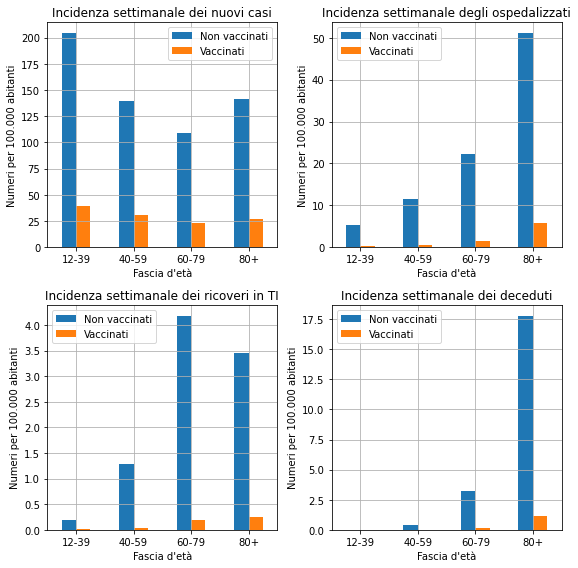

In [32]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0],kind='bar')
axes[0].set_title('Incidenza settimanale dei nuovi casi')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], kind='bar')
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], kind='bar')
axes[2].set_title('Incidenza settimanale dei ricoveri in TI')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], kind='bar')
axes[3].set_title('Incidenza settimanale dei deceduti')
which_axe(3)

plt.tight_layout()
plt.savefig('risultati/tassi_per_età.png', dpi=300)
plt.show()

### Efficacia dei vaccini

In [33]:
efficacia_contagio = (1 - df_tassi.iloc[:, 1]/df_tassi.iloc[:, 0])*100
efficacia_osp = (1 - df_tassi.iloc[:, 3]/df_tassi.iloc[:, 2])*100
efficacia_terint = (1 - df_tassi.iloc[:, 5]/df_tassi.iloc[:, 4])*100
efficacia_decessi = (1 - df_tassi.iloc[:, 7]/df_tassi.iloc[:, 6])*100

In [34]:
def add_to_plot():
    plt.ylim(70, 100)
    plt.grid()
    plt.xlabel('Fascia d\'età')
    plt.yticks(np.arange(70, 101, 5), ['70%', '75%', '80%', '85%', '90%', '95%', '100%'])

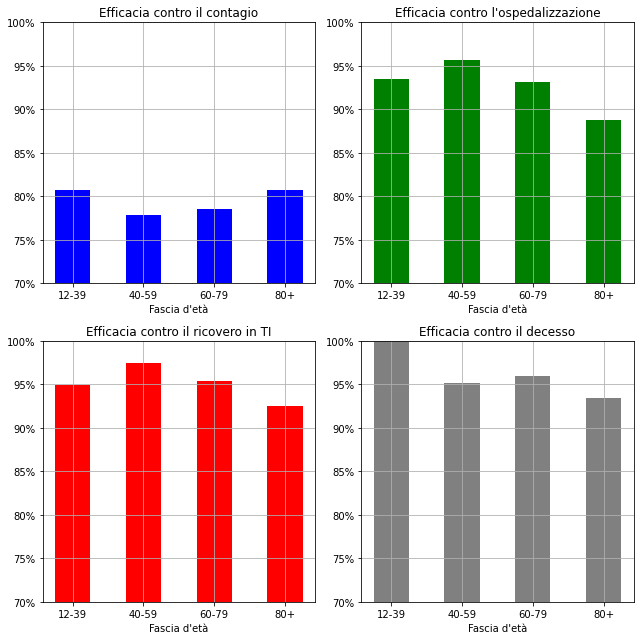

In [35]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.bar(efficacia_contagio.index, efficacia_contagio, color='blue', width=0.5)
plt.title('Efficacia contro il contagio')
add_to_plot()

plt.subplot(2, 2, 2)
plt.bar(efficacia_osp.index, efficacia_osp, color='green', width=0.5)
plt.title('Efficacia contro l\'ospedalizzazione')
add_to_plot()

plt.subplot(2, 2, 3)
plt.bar(efficacia_terint.index, efficacia_terint, color='red', width=0.5)
plt.title('Efficacia contro il ricovero in TI')
add_to_plot()

plt.subplot(2, 2, 4)
plt.bar(efficacia_decessi.index, efficacia_decessi, color='gray', width=0.5)
plt.title('Efficacia contro il decesso')
add_to_plot()

plt.tight_layout()
plt.savefig('risultati/efficacia_vaccini.png', dpi=300)
plt.show()

### Grafico riassuntivo

In [36]:
def which_axe_bar(x):
    axes[x].set_ylim(80, 100)
    axes[x].set_yticks(np.arange(70, 101, 5))
    axes[x].set_yticklabels(['70%', '75%', '80%', '85%', '90%', '95%', '100%'])
    axes[x].set_xlabel('Fascia d\'età')
    axes[x].grid()
    for tick in axes[x].get_xticklabels():
        tick.set_rotation(0)


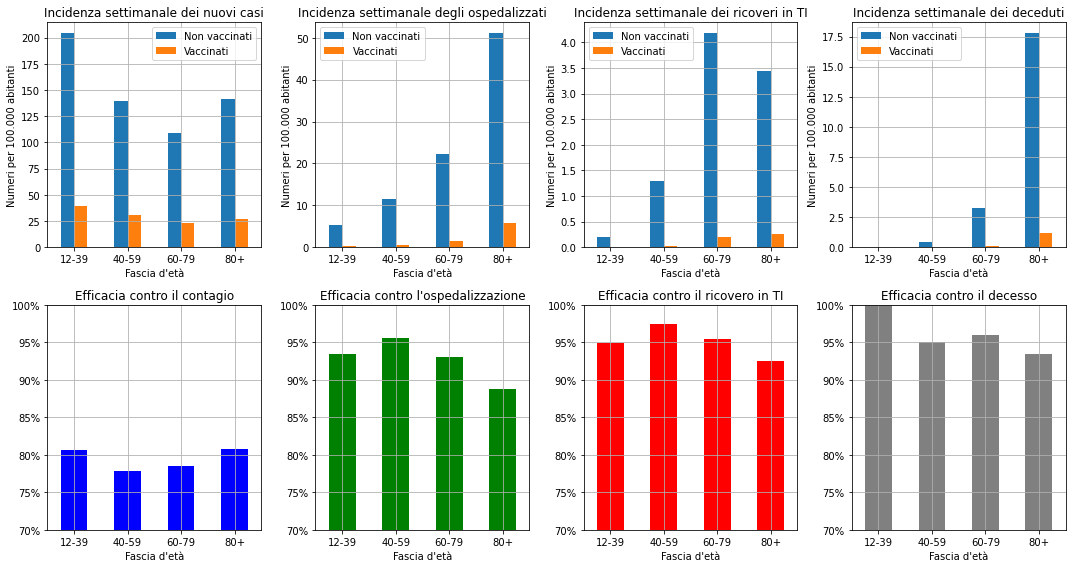

In [37]:
fig, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0],kind='bar')
axes[0].set_title('Incidenza settimanale dei nuovi casi')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], kind='bar')
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], kind='bar')
axes[2].set_title('Incidenza settimanale dei ricoveri in TI')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], kind='bar')
axes[3].set_title('Incidenza settimanale dei deceduti')
which_axe(3)

efficacia_contagio.plot(kind='bar', ax=axes[4], color='blue')
axes[4].set_title('Efficacia contro il contagio')
which_axe_bar(4)

efficacia_osp.plot(kind='bar', ax=axes[5], color='green')
axes[5].set_title('Efficacia contro l\'ospedalizzazione')
which_axe_bar(5)

efficacia_terint.plot(kind='bar', ax=axes[6], color='red')
axes[6].set_title('Efficacia contro il ricovero in TI')
which_axe_bar(6)

efficacia_decessi.plot(kind='bar', ax=axes[7], color='gray')
axes[7].set_title('Efficacia contro il decesso')
which_axe_bar(7)

plt.tight_layout()
plt.savefig('risultati/tassi_efficacia.png', dpi=300)
plt.show()